# Augmented Dickey Fuller test (ADF test)

* Ref: [https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)
* Data: [https://raw.githubusercontent.com/selva86/datasets/master/a10.csv](https://raw.githubusercontent.com/selva86/datasets/master/a10.csv)


## Unit root:

* 如果 unit root 存在就表示 time series 是 non-stationary 的
* 當 $y(t) = \alpha y(t-1) + \beta X_{e} + \epsilon$ 中的 $\alpha=1$ 時表示 unit root 存在
  * $X_{e}$ 是 exogenous variable

## Dickey-Fuller Test
* $y(t) = c + \beta t + \alpha y(t-1) + \phi \Delta y(t-1) + e_{t}$
  * $\Delta y(t-1)$: 在時間為 $t-1$ 時的第一階差異 (first difference)
* null hypothesis: $\alpha=1 \rightarrow$ unit root 存在 $\rightarrow$ time series 是 non-stationary 的
* $p$-value < 0.05 $\rightarrow$ reject the null hypothesis $\rightarrow$ time series 是 stationary 的


## Augmented Dickey Fuller (ADF) test 
* $y(t) = c + \beta t + \alpha y(t-1) + \phi_{1} \Delta y(t-1) + \phi_{2} \Delta y(t-2) + \cdots + \phi_{p} \Delta y(t-p) + e_{t}$
* null hypothesis: $\alpha=1 \rightarrow$ unit root 存在 $\rightarrow$ time series 是 non-stationary 的
* $p$-value < 0.05 $\rightarrow$ reject the null hypothesis $\rightarrow$ time series 是 stationary 的
* 當 test statistic 小於 critical value 時，reject the null hypothesis $\rightarrow$ time series 是 stationary 的
* 用 `from statsmodels.tsa.stattools import adfuller`
  * 可以指定要用幾個 lags
    * 一般來說使用 lags=$12 \times (nobs / 100)^{1/4}$
      * nobs: number of observations
    * 或是使用 `maxlags`
    * 或是使用 `autolag='AIC'` 來自動計算

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url,
                 parse_dates=['date'],
                 index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [8]:
series = df.loc[:, 'value'].values

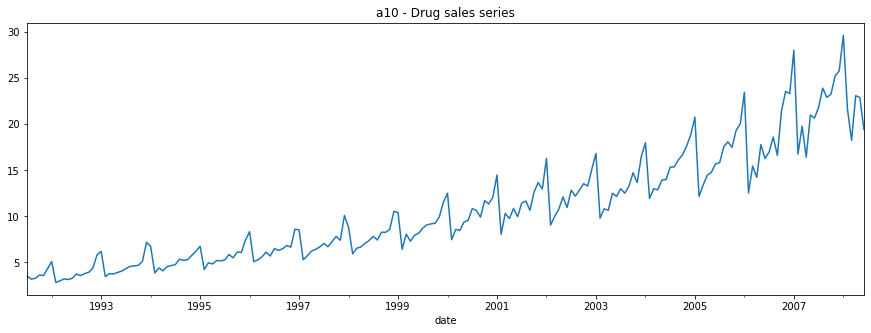

In [6]:
# fig, ax = plt.subplots(figsize=(15, 5))
df.plot(figsize=(15, 5), legend=None, title='a10 - Drug sales series')
plt.show()

In [7]:
def adf_test(time_series):
    # perform Dickey-Fuller test
    # null hypothesis: the time series is non-stationary 
    from statsmodels.tsa.stattools import adfuller # Use augmented dickey-fuller test to check stationality

    print('Results of Dickey-Fuller test:')
    adf_test = adfuller(time_series, autolag='AIC') # AIC: Akaike information criterion (AIC), the smaller AIC the better model

    index = [
      'Test statistics (ADF)',
      'p-value',
      'Number of lags used',
      'Number of observations used'
    ]
    adf_results = pd.Series(adf_test[:4], index=index)

    for k, v in adf_test[4].items():
        adf_results[f'Critical value ({k})'] = v

    print(adf_results)

    if adf_results[1] <= 0.05:
        print('Because p <= 0.05, we reject the null hypothesis')
        print('--> The time series is stationary')
    else:
        print('-->The time series is non-stationary')

In [9]:
adf_test(series)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey-Fuller test:
Test statistics (ADF)            3.145186
p-value                          1.000000
Number of lags used             15.000000
Number of observations used    188.000000
Critical value (1%)             -3.465620
Critical value (5%)             -2.877040
Critical value (10%)            -2.575032
dtype: float64
-->The time series is non-stationary


* $p$-value > 0.05 所以不 reject null hypothesis，因此 time series 是 non-stationary

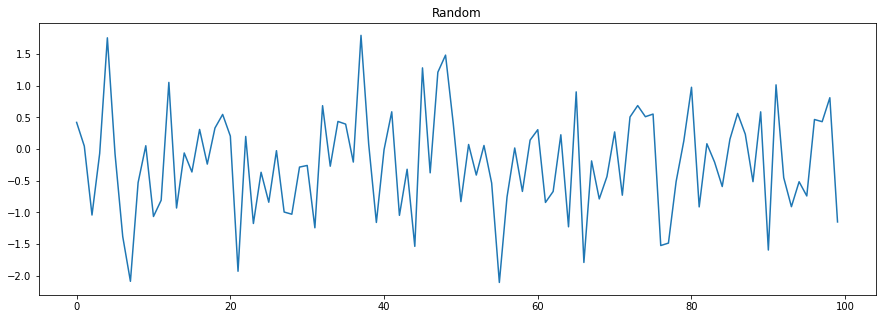

In [10]:
# 產生 random number
import numpy as np

series2 = np.random.randn(100) # 產生 100 個隨機變數

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(series2)
plt.title('Random')
plt.show()

In [11]:
adf_test(series2)

Results of Dickey-Fuller test:
Test statistics (ADF)         -1.024338e+01
p-value                        4.685704e-18
Number of lags used            0.000000e+00
Number of observations used    9.900000e+01
Critical value (1%)           -3.498198e+00
Critical value (5%)           -2.891208e+00
Critical value (10%)          -2.582596e+00
dtype: float64
Because p <= 0.05, we reject the null hypothesis
--> The time series is stationary
